In [0]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

###Requirement 1-2: Use sklearn library to generate the synthetic data for k-means clustering.


*   We set the total number of instances to be 300
*  The number of centers is 4 with the standard deviation 0.6
* The generated data was plotted with its corresponding labels by using matplotlib and seaborn

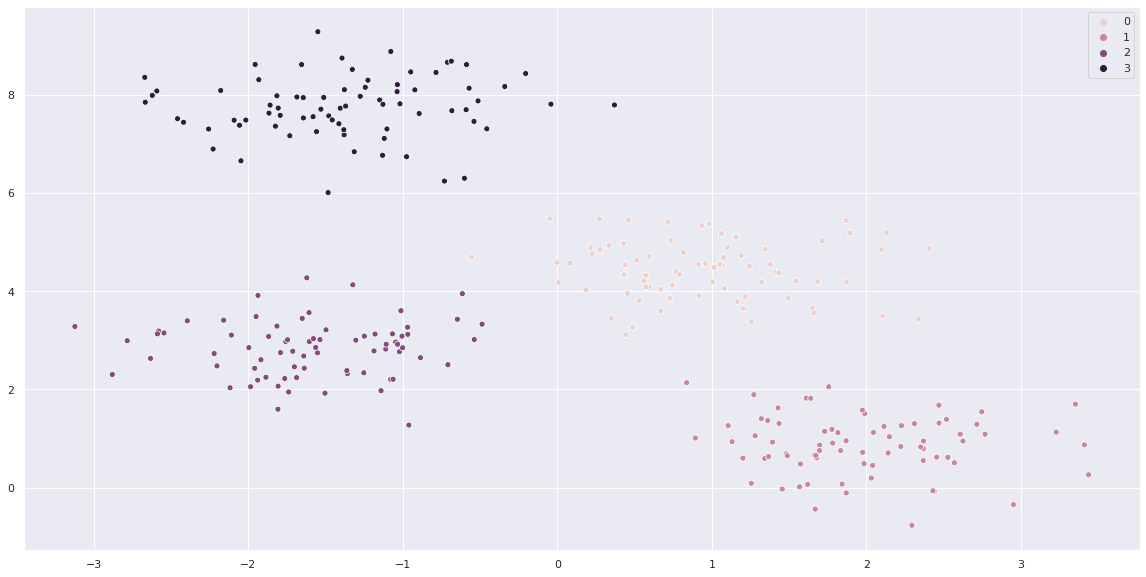

In [75]:
# manually generate dataset

# use the make_blobs() function with n_samples=300,centers=4,cluster_std=0.6 and random_state=0
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.6, random_state=0)
plt.figure(figsize=(20, 10))
sns.scatterplot(X[:,0],X[:,1],hue=y_true)
plt.show()
# store the return value to X and y_true
# plot the dataset using plt.scatter()

###Requirement 3: Implement the K-means function return the labels and centers
The following algorithm was implemented:
        # 1. Randomly choose clusters
        #     using np.random.RandomState first to set the seed and store it to a variable r
        #     using r.permutation(data shape) to choose first k data point index as initial center.
        #     store the center to a list.
        #     repeat until convergence:
        #         Assign labels based on closest center using pairwise_distances_argmin()
        #         Find new centers from means of points: 
        #             Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
        #         check for convergence:
        #             convergence if old center is new center
        #     return the centers and labels

In [0]:
def k_means(X, n_clusters,rseed=2,initial_centers=np.array([])):
      #Normal Kmeans algorithm
      if initial_centers.size==0:
        # 1. Randomly choose clusters
        #     using np.random.RandomState first to set the seed and store it to a variable r
        r = np.random.RandomState(rseed)
        #     using r.permutation(data shape) to choose first k data point index as initial center.
        k = r.permutation(X)[:n_clusters]
        #     store the center to a list.
        center_list = []
        for point in k:
          center_list.append(point)      
        center_list = np.array(center_list)
      else: 

        #Kmeans++ algorithm
        center_list = initial_centers
      
      #     repeat until convergence:
      #         Assign labels based on closest center using pairwise_distances_argmin()
      #         Find new centers from means of points: 
      #             Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
      #         check for convergence:
      #             convergence if old center is new center
      #     return the centers and labels
      convergence = 0
      while convergence == 0:
        # print("Old Center:\n",center_list)
        k_labels =pairwise_distances_argmin(X,center_list)
        new_centers = np.zeros([4, 2])
        for center in range(center_list.shape[0]):
          close_points_index = np.where(k_labels == center)
          new_centers[center][0] = X[close_points_index].mean(0)[0]
          new_centers[center][1] = X[close_points_index].mean(0)[1]
        # print("New Center:\n",new_centers)
        if (np.array_equal(new_centers,center_list)):
          # print(np.array_equal(new_centers,center_list)) 
          convergence = 1
        else:
          # print(np.array_equal(new_centers,center_list)) 
          center_list = new_centers

      
      return center_list,k_labels


#Requirement 4: Fit the model on the dataset and plot the figure with default seed

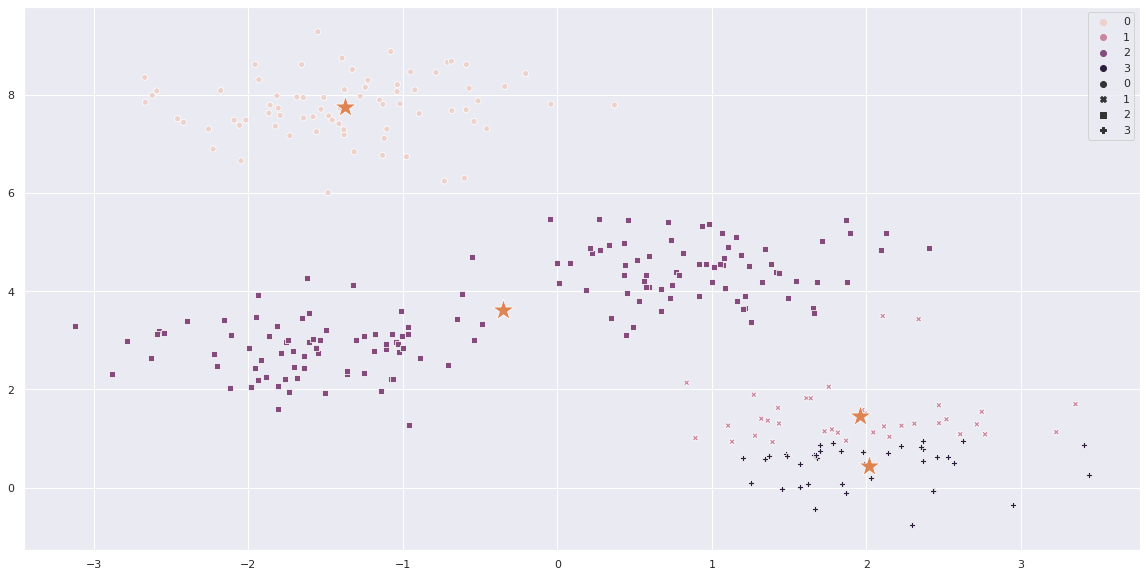

In [77]:
# fit our function to the data set with the starting point rseed=0.
centers, k_labels = k_means(X,4,0)
plt.figure(figsize=(20, 10))
sns.scatterplot(X[:,0],X[:,1],hue=k_labels,style=k_labels)
sns.scatterplot(centers[:, 0],centers[:, 1],marker='*',s=500)
plt.show()
# plot the figures

###Requirement 5: Fit the model on the dataset and plot the figure with seed=2

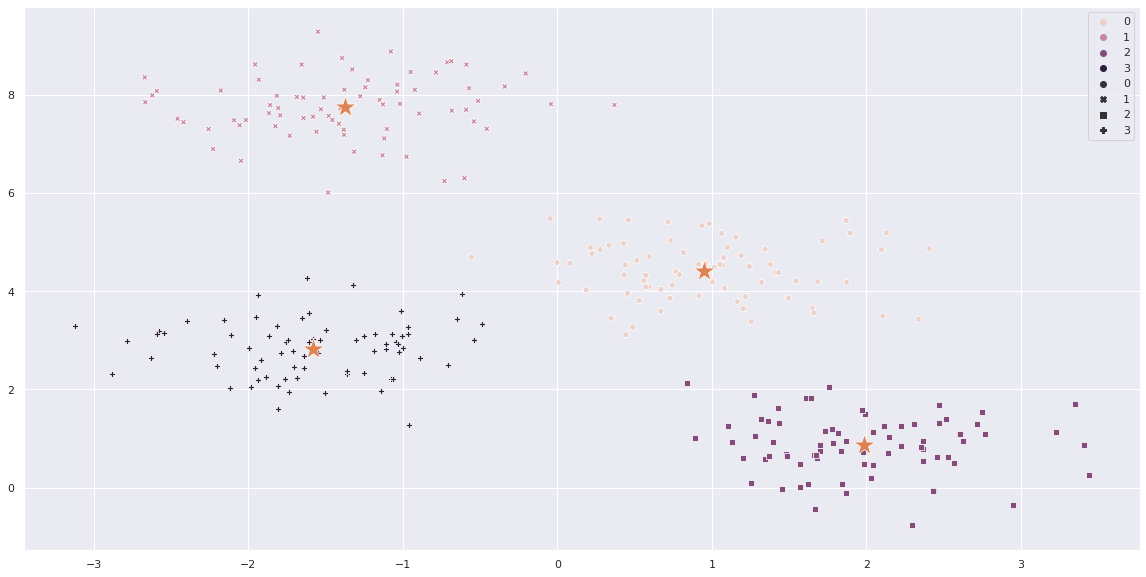

In [78]:
# fit our function to the data set with the starting point rseed=2.
centers, k_labels = k_means(X,4,2)
plt.figure(figsize=(20, 10))
sns.scatterplot(X[:,0],X[:,1],hue=k_labels,style=k_labels)
sns.scatterplot(centers[:, 0],centers[:, 1],marker='*',s=500)
plt.show()

###Requirement 6: Compare the results from 4 and 5. Is there any differences? If yes, why?

Given that the K-means algorithm is a stochastic process, the random initialization of the centroids is very important to achieve the best global solution. However, using different seeds for our random number generator allows us to take advantage of the deterministic nature of pseudo random number generation and choose the best seed value that yields the best initial centroids. As seen above, setting the rseed = 0 resulted in a poor initialization of the centroids as evidenced by cluster 3 in Requirement 4(which contains what should have been two clusters into one). Setting rseed to 2 in Requirement 5 created 4 separable clusters as originally intended. 

###Requirement 7: . Implement the K-means++ function return the labels and centers.
This algorithm expands on the traditional kmeans algorithm by initializing the centers to avoid sub-optimal clustering. The centroid initialization algotithm is as follows:
    #     create a empty list store centers 
    #     random choose a center:
    #         random choose a index:  
    # using np.random.RandomState first to set the seed and store it to a variable r
    # using r.permutation(data shape) to choose first data point index as initial center.
    # append this center to the center list
    #     while the length of the list less than k:
    #         calculate dj for all data point: dj=min(||x^j-c_k||) whiere dj store the distance to the cloest center
    #         calculate pj: pj=dj^2/sum_all(d^2) for all data point
    #         random choose j using the probability:
    #             using np.random.choice()
    #         set the new center to be x^j
    #         append the new center to center list

In [0]:
def eucl_dist(a, b, axis=1):
    # def the function that calculate the L2 distance
    return np.sum((a - b)**2)

# def the init function for kmean++:
# 
def init_center(k,X,rseed):
  #     create a empty list store centers 
  centroids = []
  #     random choose a center:
  #         random choose a index:  
  # using np.random.RandomState first to set the seed and store it to a variable r
  r = np.random.RandomState(rseed)
  # using r.permutation(data shape) to choose first data point index as initial center.
  random_index = np.random.randint(0,X.shape[0])
  initial_centroid =   r.permutation(X)[random_index]
  # append this center to the center list
  centroids.append(initial_centroid)

  while(len(centroids)<k):
    #     while the length of the list less than k:
    #         calculate dj for all data point: dj=min(||x^j-c_k||) whiere dj store the distance to the cloest center
    #         calculate pj: pj=dj^2/sum_all(d^2) for all data point
    #         random choose j using the probability:
    #             using np.random.choice()
    #         set the new center to be x^j
    #         append the new center to center list
    d_points = []
    for point in X:
      centroid2point = []
      for centroid in centroids:
        centroid2point.append(eucl_dist(centroid,point))
      dj = np.array(min(centroid2point))
      d_points.append(dj)
  
    p_points = []
    for min_d in d_points:
      pj = np.array((min_d**2)/(np.sum(np.square(d_points))))
      p_points.append(pj)


    j = np.random.choice(X.shape[0],p=p_points)
    new_center = X[j]
    centroids.append(new_center)
  center_list = np.zeros([4,2])
  for centroid in range(len(centroids)):
    center_list[centroid][0] = centroids[centroid][0]
    center_list[centroid][1] = centroids[centroid][1]
  # print(np.array(centroids).reshape(4,2))
          # for center in range(center_list.shape[0]):
          # close_points_index = np.where(k_labels == center)
          # new_centers[center][0] = X[close_points_index].mean(0)[0]
          # new_centers[center][1] = X[close_points_index].mean(0)[1]
  
  #     return all centers
  return center_list

In [0]:
# def the kmean++:
def k_meanspp(X, n_clusters,rseed):
    # first init centers
    initial_centers = init_center(n_clusters,X,rseed)
    print("Initial Centroids")
    plt.figure(figsize=(10, 5))
    sns.scatterplot(X[:,0],X[:,1])
    sns.scatterplot(initial_centers[:, 0],initial_centers[:, 1],marker='*',s=500)
    plt.show()

    # then, run the k-means with the initialized centers.
    centers, k_labels = k_means(X,n_clusters,rseed,initial_centers)
    return centers, k_labels
    

###Requirement 8: Fit the model on the dataset and plot the figure with default seed.
The initial centroids are also plotted for comparison. 

Initial Centroids


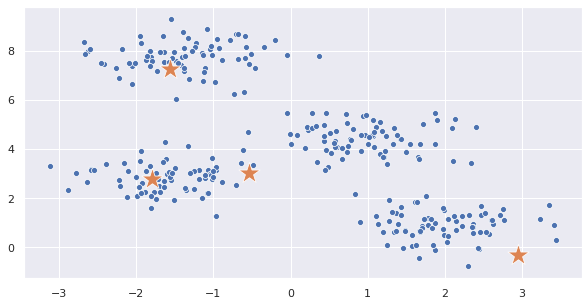

Clustered Data: 


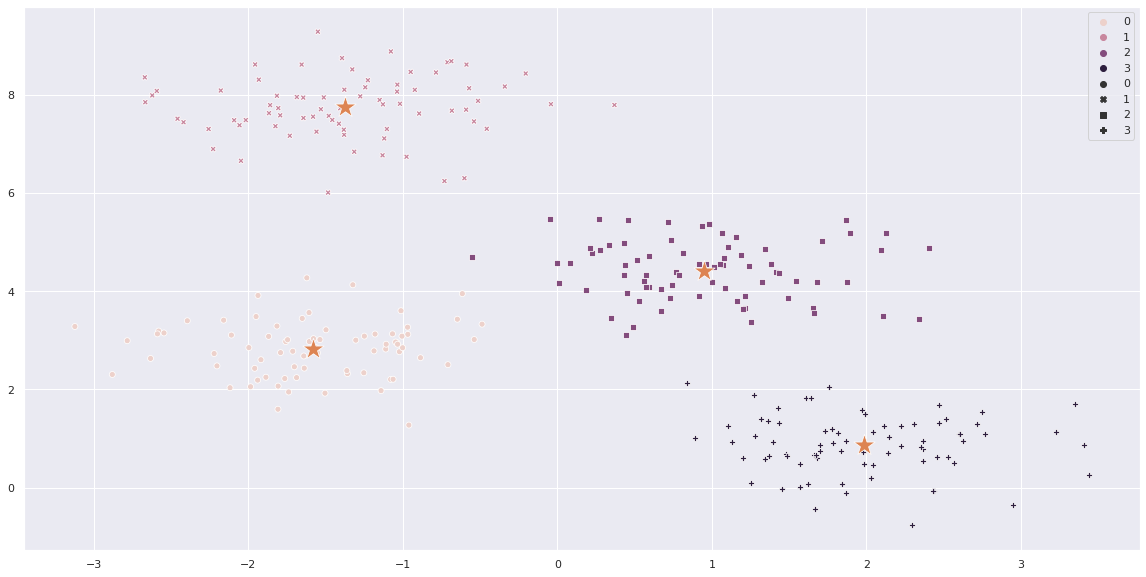

In [81]:
# fit our kmean++ function to the data set with rseed=2.
# plot the figure
centers, k_labels = k_meanspp(X,4,0)
print("Clustered Data: ")
plt.figure(figsize=(20, 10))
sns.scatterplot(X[:,0],X[:,1],hue=k_labels,style=k_labels)
sns.scatterplot(centers[:, 0],centers[:, 1],marker='*',s=500)
plt.show()


###Requirement 9: Fit the model on the dataset and plot the figure with seed=2.
The initial centroids are also plotted for comparison. 

Initial Centroids


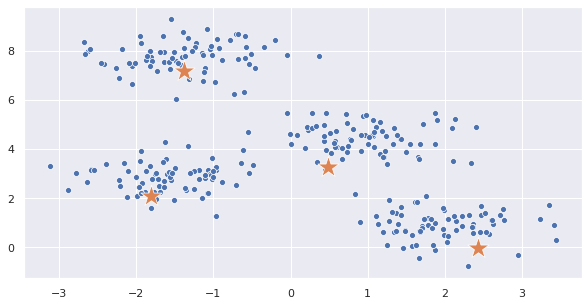

Clustered Data: 


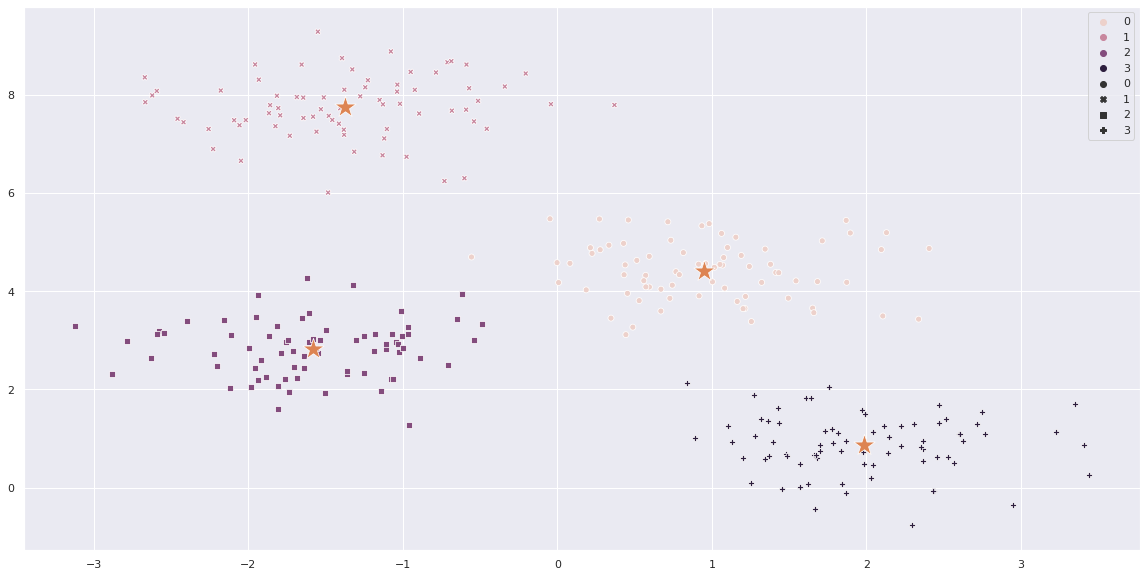

In [82]:
# fit our kmean++ function to the data set with rseed=0.
# plot the figure
centers, k_labels = k_meanspp(X,4,2)
print("Clustered Data: ")
plt.figure(figsize=(20, 10))
sns.scatterplot(X[:,0],X[:,1],hue=k_labels,style=k_labels)
sns.scatterplot(centers[:, 0],centers[:, 1],marker='*',s=500)
plt.show()
plt.show()

###Requirement 10: Compare the results from 8 and 9. Is there any differences? If yes, why?

In order to avoid the problems presented by the original kmeans algorithm, the kmeans ++ algorithm was implemented which employs a smarter initialization of the centroids. However, kmean++ is still dependent on a random seed as the first initial centroid is randomly chosen. Even though both rseeds (0 and 2) resulted in the intended clusters, rseed=0 initialized centroids that are farther away from each other, which increases the probability of better clustering. 

###Requirement 11: Compare the results from 4,5,8 and 9. State your observations.

Clustering in Requirements 4,5,8, and 9 yielded comparable, yet different results. Overall, Requirements 8 and 9 yielded better results due to the use of the kmeans++ algorithm. Even though Requirement 5 yielded the same clusters as requirements 8 and 9, the probability of achieving the same results for more complex datasets is lower as the centroid initializations is totally random. Kmeans++ eliminates this mishap by smartly initializing the centroids through minimizing intra-class variance after each kth iteration. 

###Resources:

*   https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

* https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

* https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

* https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
* https://www.coursera.org/learn/machine-learning/lecture/93VPG/k-means-algorithm



